In [1]:
# Load local modules
import sys
sys.path.append('d:\\Users\\serfe\\Documents\\GitHub\\seisinv\\src')
from basic_ops_seis_inv import Filtering, ConversionTool
# Load standard libraries
import matplotlib.pyplot as plt
import pandas as pd

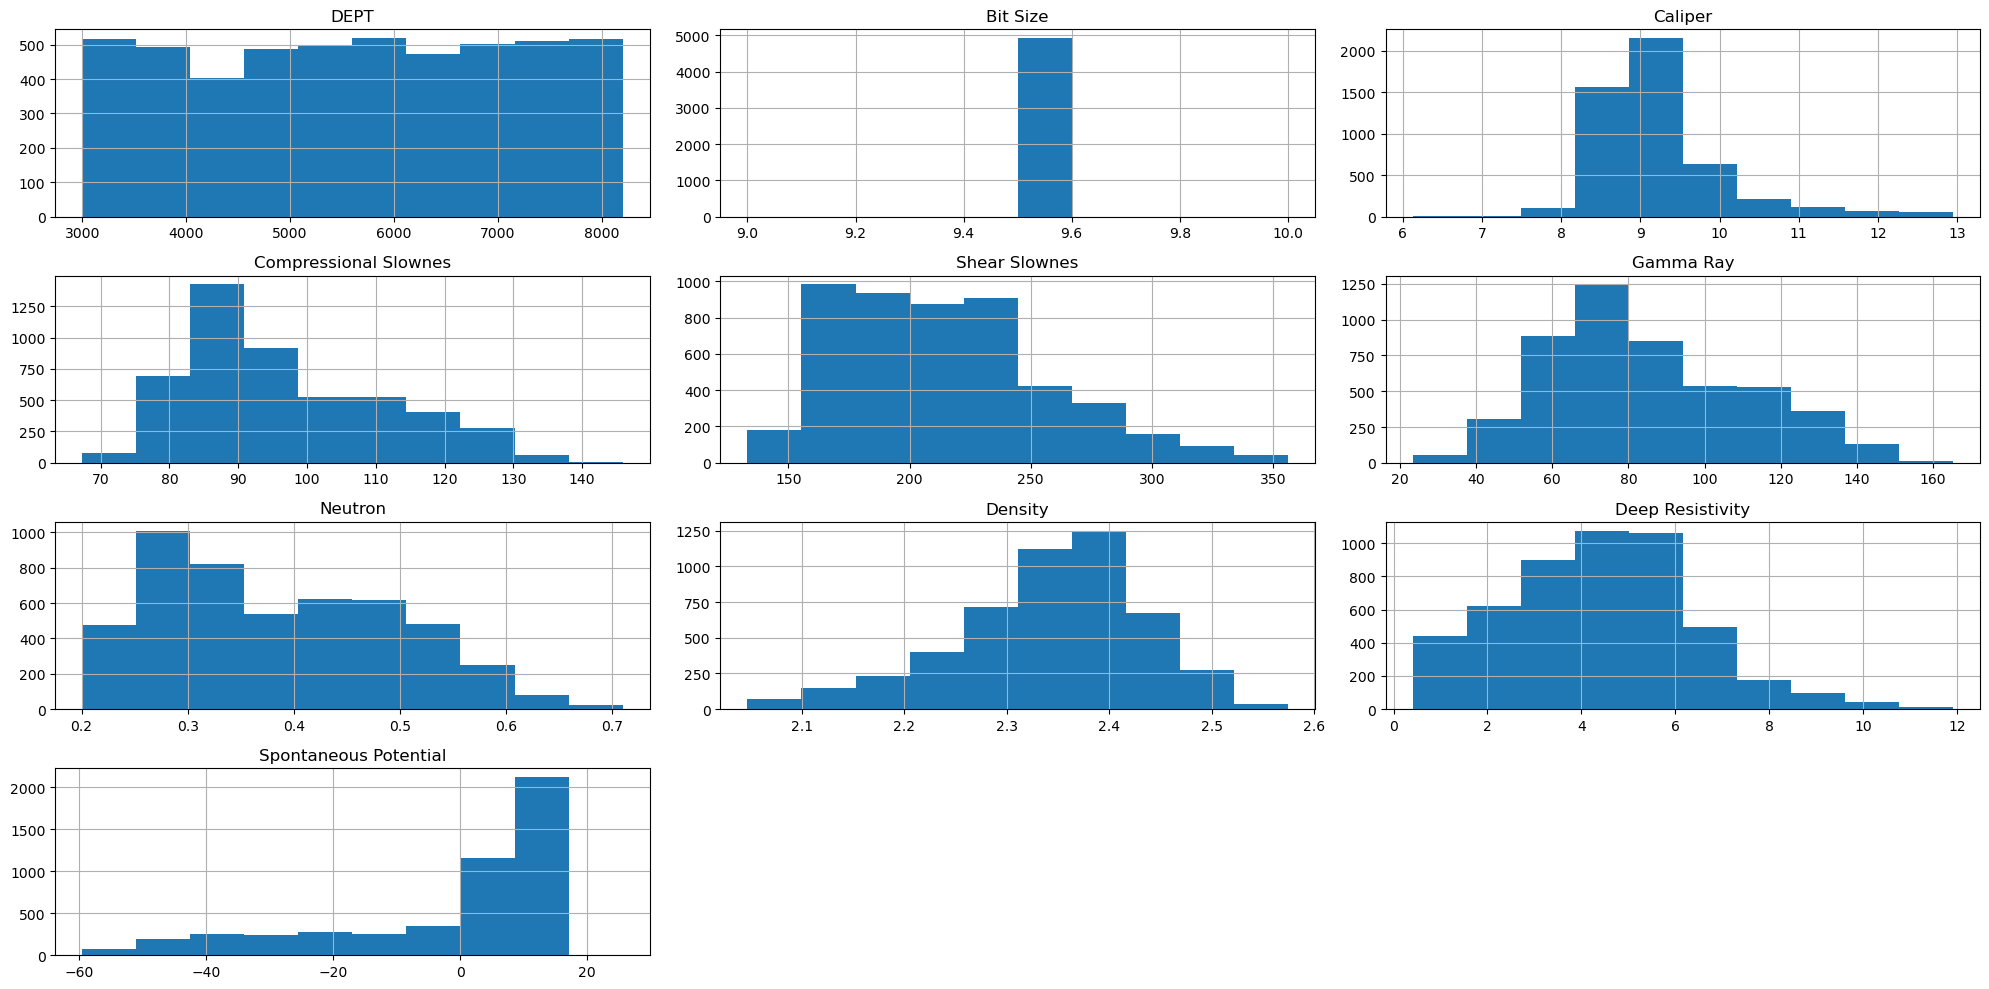

In [2]:
# Load data
path_data = 'd:\\Users\\serfe\\Documents\\GitHub\\seisinv\\data\\Task2_data.xlsx'
df = pd.read_excel(path_data)
# Remove outliers
df = Filtering().remove_outliers(df, drop_col=['Surface', 'Bit Size'])
# Plot data
df.hist(figsize=(20,10))
plt.tight_layout()

In [3]:
# Backus conversion to seismic domain
vp = 1 / ConversionTool().SI_conversion(df['Compressional Slownes'], 'micros/ft')
vs = 1 / ConversionTool().SI_conversion(df['Shear Slownes'], 'micros/ft')
rho = ConversionTool().SI_conversion(df['Density'], 'g/cm3')
depth = df['DEPT']
vp0, vs0, rho0, dept0 = ConversionTool(104, vp, vs, rho, 3000, depth).backus_downsampling()

Output units: kg/m3
Original sampling frequency (in well-log domain) is: 14853.21312132847 Hz
New sampling frequency (in seismic domain) is: 119.49768920340398 Hz


Text(0.5, 1.0, 'Backus conversion: From Well-log domain to Seismic domain')

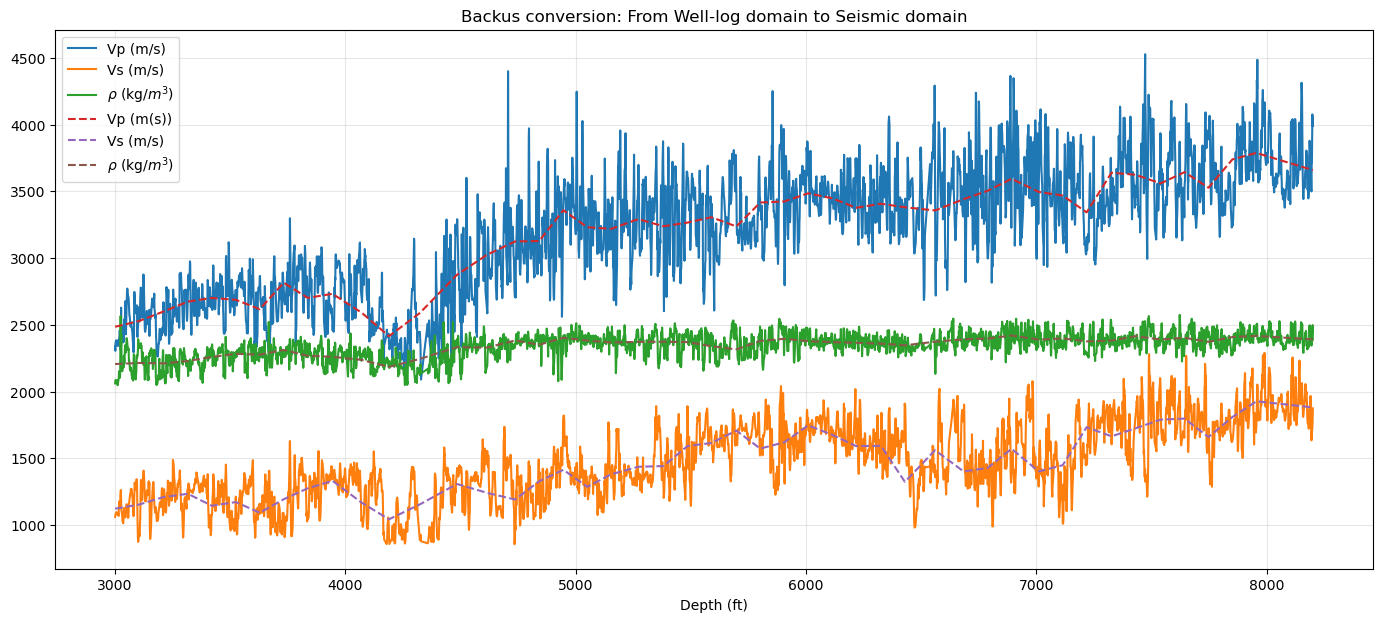

In [4]:
# Plot resmapled data
fig = plt.figure(figsize=(17,7))
plt.plot(df.DEPT, vp, label='Vp (m/s)')
plt.plot(df.DEPT, vs, label='Vs (m/s)')
plt.plot(df.DEPT, rho, label=fr'$\rho$ (kg/$m^3$)')
plt.plot(dept0, vp0, label='Vp (m(s))', linestyle='dashed')
plt.plot(dept0, vs0, label='Vs (m/s)', linestyle='dashed')
plt.plot(dept0, rho0, label=fr'$\rho$ (kg/$m^3$)', linestyle='dashed')
plt.xlabel('Depth (ft)')
plt.grid(alpha=.3)
plt.legend(ncol=1)
plt.title('Backus conversion: From Well-log domain to Seismic domain')

The continuous curves represent the original data from the well-log (sampled in kHz), and the dashed curves are the resampled data using the Backus method. The data was resampled to 120 Hz, which is a common value to work with in the seismic domain.